FIRST ML MODEL (LINEAR REGRESSION ) TO PREDICT MEDICAL CHARGES 

In [1]:
# downloading url and retrieveing it 
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv') 

('medical.csv', <http.client.HTTPMessage at 0x7f106f226390>)

DATA VIEWING AND PREPROCESSING 

In [2]:
import pandas as pd 
medical_df=pd.read_csv('medical.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#checking the data type for each column in the dataframe
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#summary of some statstics about the dataframe
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


SETTING CODES TO PLOT SOME CHARTS 

In [5]:
#importing visualizaion libriaries 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#devolping some setting to improve the upcoming charts 
sns.set_style=('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [7]:
#ploting age to know its distrubtion
fig= px.histogram(medical_df,
                  x='age',
                  marginal='box',
                  nbins=47,
                  title='AGE DIST.')
fig.update_layout(bargap=0.1)
fig.show()


In [8]:
#ploting bmi to know its distrbution 
fig=px.histogram(medical_df,
                 x='bmi',
                 marginal='box',
                 color_discrete_sequence=['red'],
                 title='BMI DIST.')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
# PLOTING cahrges with smoke variabe to figure out its dist. according to smoking factor 
fig= px.histogram(medical_df,
                  x='charges',
                  color='smoker',
                  color_discrete_sequence=['green',"black"],
                  marginal='box',
                  title='MEDICAL CHARGES FOR SMOKERS DIST')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig=px.histogram(medical_df,
                 x='charges',
                 color='sex',
                 color_discrete_sequence=['blue','red'],
                 marginal='box',
                 title='MEDICAL CHARGES ACCORDING TO SEX')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
# ploating charges according to region
fig= px.histogram(medical_df,
                  x='charges',
                  color='region',
                  marginal='box',
                  title='MEDICAL CAHRGES ACCORDING TO REGION')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
px.histogram(medical_df,x='smoker', color='sex', title='SMOKER ACCORDING TO SEX')

In [13]:
px.histogram(medical_df, x='region',color='sex' ,title='sex dist')

In [14]:
fig= px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='CHARGES BY AGE')
fig.update_traces(marker_size=5)
fig.show()

In [15]:
fig=px.scatter(medical_df,
               y='charges',
               x='bmi',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title='CHARGES BY BMI')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
fig=px.violin(medical_df,
              y='charges',
              x='children',
              color='smoker',
              hover_data=['sex'],
              title='CHARGES BY CHILDERN NO.')

fig.show()

''

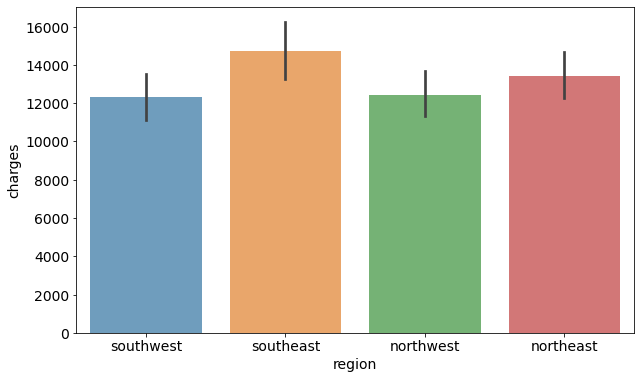

In [17]:
 sns.barplot(data=medical_df,
                 x='region',
                 y='charges',
                 alpha=0.7)
 ;


In [19]:
medical_df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


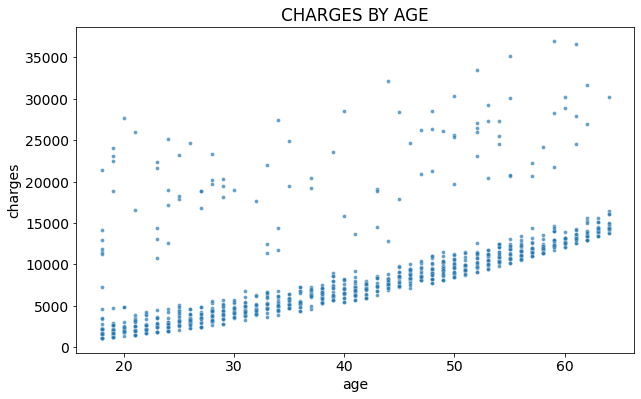

In [20]:
# ploting the realtionship between age and charges (non-smokers)
plt.title('CHARGES BY AGE')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s= 15);

In [21]:
# y= b+b1x+e
def estimate_charges(age, b,e):
  return b*age+e


DIVIDING DATA INTO TRAIN, VALDITION AND TEST 

In [22]:
# performing test and split to the data
from sklearn.model_selection import train_test_split
train_val_df, test_df =train_test_split(medical_df, test_size= 0.2 )
train_df, val_df = train_test_split(train_val_df, test_size = 0.25)


In [23]:
print('train shape :', train_df.shape)
print('val shape :', val_df.shape)
print('test shape:', test_df.shape)

train shape : (802, 7)
val shape : (268, 7)
test shape: (268, 7)


In [156]:
# identifying features that will used to predict charges
input_colms= list(train_df.columns)[:6]
target_colm = 'charges'
print(input_colms)

['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [157]:
# identifying input and target for train data
train_inputs= train_df[input_colms].copy()
train_targets = train_df[target_colm].copy()
# ... for test data
test_inputs= test_df[input_colms].copy()
test_targets = test_df[target_colm].copy()
#... for valdition data
val_inputs=val_df[input_colms].copy()
val_targets= val_df[target_colm].copy() 

In [158]:
train_inputs.head()

,age,sex,bmi,children,smoker,region
586,21,male,20.235,3,no,northeast
626,36,male,28.880,3,no,northeast
1057,45,female,31.790,0,no,southeast
832,28,female,23.845,2,no,northwest
1116,41,male,29.640,5,no,northeast


In [159]:
# setting numric and categorical columns
import numpy as np
numirc_colms= train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_colms= train_inputs.select_dtypes('object').columns.tolist() 
train_inputs[numirc_colms].describe()

,age,bmi
count,802.000000,802.000000
mean,38.948878,30.563965
std,13.956903,6.014127
min,18.000000,15.960000
25%,26.000000,26.315000
50%,39.000000,30.275000
75%,51.000000,34.273750
max,64.000000,53.130000


In [161]:
train_inputs[categorical_colms].head()

,sex,smoker,region
586,male,no,northeast
626,male,no,northeast
1057,female,no,southeast
832,female,no,northwest
1116,male,no,northeast


In [160]:
medical_df[numirc_colms].isna().sum()

age    0
bmi    0
dtype: int64

CATEGORICAL DATA CODING

In [162]:
# Converting categorical columns into codes to use them in prediction 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')
encoder.fit(medical_df[categorical_colms])
# creating columns names for each indivdual category 
coded_cols= list(encoder.get_feature_names(categorical_colms))
# transforming data for each data set that have been created 
test_inputs[coded_cols]= encoder.transform(test_inputs[categorical_colms])
train_inputs[coded_cols]=encoder.transform(train_inputs[categorical_colms])
val_inputs[coded_cols]= encoder.transform(val_inputs[categorical_colms])

In [163]:
# verfying the previous process of transformming columns 
test_inputs.head()

,age,sex,bmi,children,smoker,region,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
726,41,male,28.405,1,no,northwest,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1181,24,female,29.925,0,no,northwest,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
220,34,female,33.700,1,no,southwest,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
322,34,male,30.800,0,yes,southwest,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
861,38,female,28.000,3,no,southwest,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [164]:
train_inputs[numirc_colms].head()

,age,bmi
586,21,20.235
626,36,28.880
1057,45,31.790
832,28,23.845
1116,41,29.640


In [165]:
train_inputs[coded_cols].head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
586,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
626,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1057,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1116,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [166]:
print('train_input:', train_inputs.shape)
print('train_target:', train_targets.shape)
print('val_input:', val_inputs.shape)
print('val_target:', val_targets.shape)
print('test_input:', test_inputs.shape)
print('test_target:', test_targets.shape)

train_input: (802, 14)
train_target: (802,)
val_input: (268, 14)
val_target: (268,)
test_input: (268, 14)
test_target: (268,)


In [167]:
# fitting linear regression model with training data 
lr= LinearRegression()
lr.fit(train_inputs[numirc_colms+coded_cols], train_targets)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
# making predictions and evaluate model 
X_train = train_inputs[numirc_colms+coded_cols]
X_test= test_inputs[numirc_colms+coded_cols]
X_val= val_inputs[numirc_colms+coded_cols]
# getting predictions
train_pred= lr.predict(X_train)
#acuurcy test
from sklearn.metrics import r2_score
accuracy= r2_score(train_targets, train_pred)
print('train acuuarcy :{:.2f}%'.format(accuracy*100))

train acuuarcy :74.97%


In [169]:
test_pred= lr.predict(X_test)
test_pred;

In [170]:
def predictor(input, target):
  lr.fit(input, target)
  pred= lr.predict(input)
  accuracy= r2_score(target, pred)
  print(' Acuuarcy :{:.2f}%'.format(accuracy*100))
  
  return pred

In [171]:
predictor(X_train, train_targets);

 Acuuarcy :74.97%


In [96]:
predictor(X_val, val_targets);

 Acuuarcy :71.22%


BEST ACCURCY ACHEIVED SO FAR

In [172]:
predictor(X_test, test_targets);

 Acuuarcy :78.50%


A PROBLEM APPEARED with USING SGD REGRESSOR

In [173]:
# using stochastic gradient descent
from sklearn.linear_model import SGDRegressor
sgd_model= SGDRegressor()
sgd_model.fit(train_inputs[numirc_colms+coded_cols], train_targets)





SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [174]:
train_inputs[numirc_colms+coded_cols].head()


,age,bmi,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
586,21,20.235,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
626,36,28.880,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1057,45,31.790,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
832,28,23.845,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1116,41,29.640,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [175]:
# defining a code to predict the sgd model 

def sgd_predictor(input, target):
  sgd_model.fit(input, target)
  pred= sgd_model.predict(input)
  accuracy= r2_score(target, pred)
  print('Accuracy :{:.2f}%'. format(accuracy*100))
  return pred

In [176]:
# identify model fitting for the three data parts we created
X_train_sgd = train_inputs[numirc_colms+coded_cols]
X_test_sgd= test_inputs[numirc_colms+coded_cols]
X_val_sgd= val_inputs[numirc_colms+coded_cols]

In [177]:
sgd_predictor(X_val_sgd, val_targets);

Accuracy :-102476847903640736.00%


APPLYING MODEL ON NON-SMOKERS ONLY 

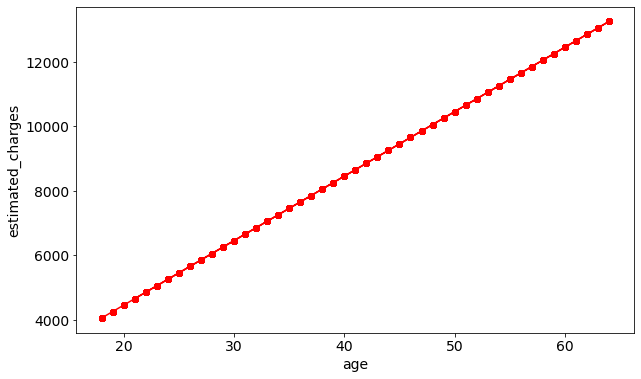

In [107]:
ages = non_smoker_df.age
b=200
e=450
estimated_charges=estimate_charges(ages,b,e)
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('age')
plt.ylabel('estimated_charges');

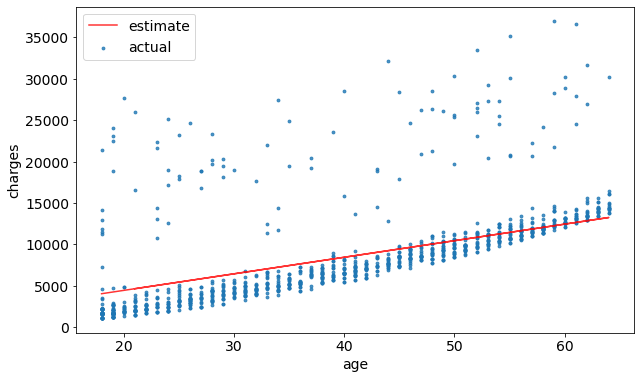

In [108]:

target = non_smoker_df.charges
plt.scatter(ages, target, s=8 ,alpha=0.8);
plt.plot(ages, estimated_charges,'r', alpha=0.8)
plt.xlabel('age');
plt.ylabel('charges');
plt.legend(['estimate','actual']);

In [109]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [110]:
def try_parmeters(b,e):
  ages= non_smoker_df.age
  target= non_smoker_df.charges
  estimated_charges= estimate_charges(ages,b,e)
  plt.scatter(ages, target, alpha=0.9)
  plt.plot(ages, estimated_charges, 'r')
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['estimate','actual'])
  loss= rmse(target, estimated_charges)
  print('RMSE : ', loss)

BEST ACCURCY ACHEIVED WITHOUT FITTING THE MODEL " JUST BY TRYING DIFFRENT PARAMETERS

RMSE :  4761.541311090524


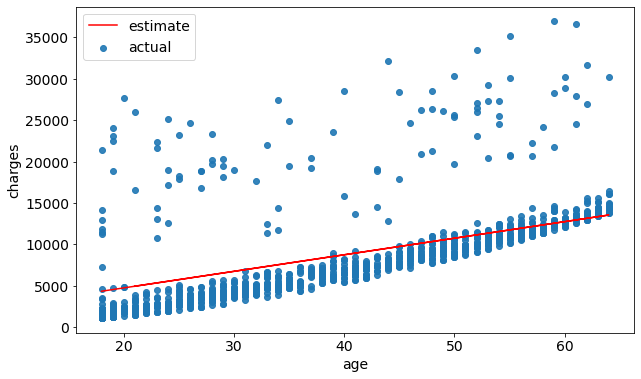

In [111]:
try_parmeters(200,750);

In [112]:
#defining root mean square error
import numpy as np
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))


In [113]:
rmse(target, estimated_charges)

4758.843980887758

APPLYING LINEAR REGRESSION MODEL TO NON-SMOKERS 

In [114]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [193]:
# defining the inputs and targets to fit the model 
input = non_smoker_df[['age']]
target = non_smoker_df.charges
print('input shape', input.shape)
print('target shape', target.shape)

input shape (1064, 1)
target shape (1064,)


In [194]:
# FITTING MODEL
model.fit(input, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

NOT BAD PREDICTIONS FOR USING SINGLE LINEAR REGRESSION

In [195]:
preds = model.predict(input)
rmse(target, preds)

4662.505766636391

In [196]:
model.coef_

array([267.24891283])

In [184]:
model.intercept_

294.2468891087901

RMSE :  4662.505766636394


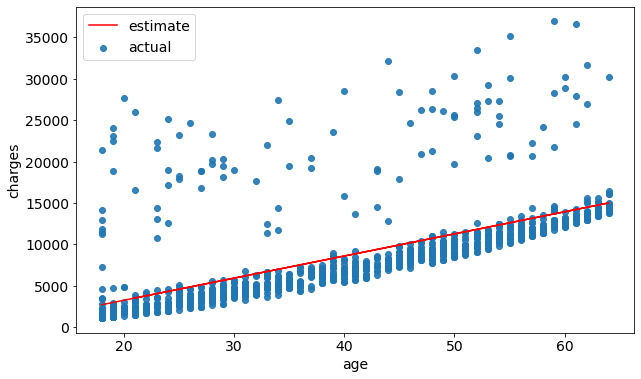

In [186]:
try_parmeters(267.24891283,-2091.4205565650864)

USING STOCAHSTIC GRAIENT DESCENT 

In [187]:
from sklearn.linear_model import SGDRegressor

In [197]:
modelSgd= SGDRegressor(max_iter=10000, learning_rate='adaptive', tol=0.01)
modelSgd.fit(input, target)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.01, validation_fraction=0.1, verbose=0,
             warm_start=False)

NOT THAT GOOD IN PREDICTIONS

In [211]:
sgd_preds= modelSgd.predict(input)
rmse(sgd_preds,target)

4702.340635494936

In [212]:
modelSgd.coef_

array([308.56475018])

In [213]:
modelSgd.intercept_

array([-3905.19405826])

1.0

RMSE :  4702.340635494936


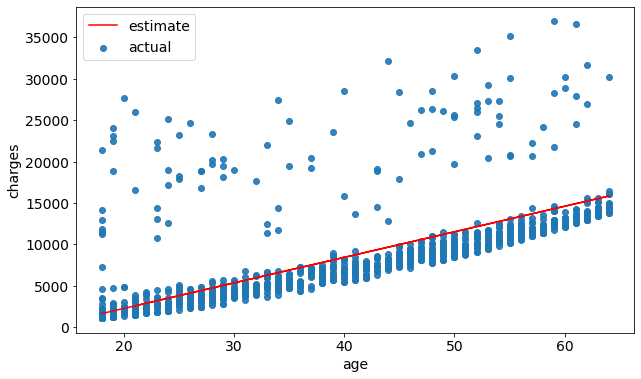

In [214]:
try_parmeters(modelSgd.coef_,modelSgd.intercept_)

NOW APPLYING USING SMOKERS ONLY 

In [141]:
smokers_df=medical_df[medical_df.smoker=='yes']
smokers_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.9240,1,0,0.0,0.0,0.0,1.0
11,62,female,26.29,0,yes,southeast,27808.7251,1,0,0.0,0.0,1.0,0.0
14,27,male,42.13,0,yes,southeast,39611.7577,1,1,0.0,0.0,1.0,0.0
19,30,male,35.30,0,yes,southwest,36837.4670,1,1,0.0,0.0,0.0,1.0
23,34,female,31.92,1,yes,northeast,37701.8768,1,0,1.0,0.0,0.0,0.0


A VERY BAD DESCISION TO DEPEND ON SMOKERS 

In [142]:
input, target =smokers_df[['age']], smokers_df.charges
model1=LinearRegression()
model1.fit(input,target)
preds=model1.predict(input)
loss = rmse(target, preds)
print('RMSE:', loss)

RMSE: 10711.00334810241


In [143]:
model1.coef_, model1.intercept_

(array([305.23760211]), 20294.128126915966)

AS WE CAN SEE THAT THE DISTRBUTION OF SMOKERS IS NOT NORMAL AND NOT LINEAR ALSO 

RMSE: 10711.00334810241


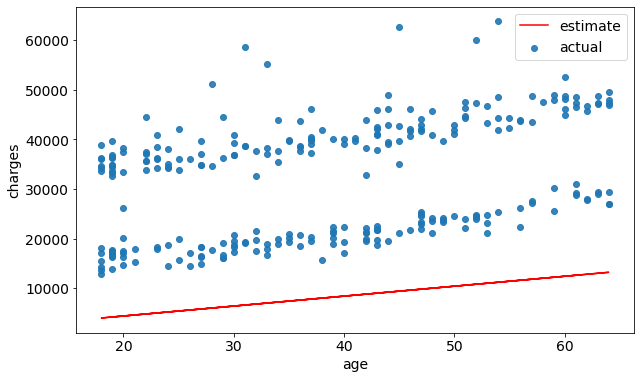

In [144]:

age= smokers_df.age
target=smokers_df.charges
estimated_charges=estimate_charges(age,b,e)
plt.scatter(age, target, alpha=0.9)
plt.plot(age, estimated_charges,'r')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend(['estimate','actual']);
print('RMSE:',loss)

SHIFTING TO MULTIPLE REGRESSION "WITHOUT SPLITING THE DATA"

In [145]:
#converting catgorical data into binary based code 

smoker_code= {'no' : 0 ,'yes' : 1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_code)
medical_df.head()


,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [146]:
sex_code ={'female':0, 'male' : 1}
medical_df['sex_code']= medical_df.sex.map(sex_code)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [147]:
# preparing one hot encoding for region column
from sklearn import preprocessing
enc= preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_
# conerting dtype into array
one_hot= enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [148]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']]= one_hot
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


AS WE CAN SEE NOT SPLITTING DATA HAVE NEGTIVELY AFFECTED THE MODEL 

In [149]:
 #Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
preds= model.predict(inputs)
loss = rmse(targets, preds)
print('loss:', loss)

loss: 6041.679651174453


DATA PREPROCESSING

In [150]:
print('coeficent:', model.coef_)  , print('intercept:', model.intercept_)

coeficent: [  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
intercept: -12525.547811195444


(None, None)

In [151]:
wegihts_df=pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight' : np.append(model.coef_, model.intercept_)
})
wegihts_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [152]:
# standarizing numirc columns weights 
from sklearn.preprocessing  import StandardScaler
numirc_col=['age', 'bmi', 'children']
scaler= StandardScaler()
scaler.fit(medical_df[numirc_col])
scaled_input= scaler.transform(medical_df[numirc_col])
scaled_input 

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [153]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

HERE THE ACCURCY IS NOT GOOD ABOUT 66% 

In [179]:
inputs = np.concatenate((scaled_input, categorical_data), axis=1)
target= medical_df.charges
model=LinearRegression()
model.fit(inputs, target)
preds= model.predict(inputs)
loss = rmse(target, preds)
Accuracy= r2_score(preds, target)
print('loss:', loss)
print('Acuurcy:{:.2f}%'.format(Accuracy*100))

loss: 6041.679651174453
Acuurcy:66.83%


In [155]:
wegihts_df= pd.DataFrame({
    'feature' : np.append(numirc_col+cat_cols,1),
    'weights': np.append(model.coef_, model.intercept_)
})
wegihts_df

,feature,weights
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,8466.483215


Trying on a new dataset 
